<a href="https://colab.research.google.com/github/muzeyir/gene-expression-cancer-classification/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Capstone Project: Disease Classification from Gene Expression Data

## 🎯 Objective:
The goal of this project is to classify the **type of cancer** based on gene expression data from various samples. The dataset includes expression levels for 20,532 genes across 801 patient samples.

We aim to:
- Perform data cleaning and exploratory analysis
- Reduce high-dimensional features (PCA, t-SNE)
- Build multi-class classification models
- Interpret model predictions using SHAP or similar tools

---

**Classes (Cancer Types):**
- BRCA: Breast cancer
- LUAD: Lung cancer
- PRAD: Prostate cancer
- KIRC: Kidney cancer
- COAD: Colon cancer
---

**Dataset Overview:**
- `data.csv` — gene expression matrix (801 samples × 20,532 genes)
- `labels.csv` — target class for each sample (cancer or not)

In [ ]:
import pandas as pd


df_data = pd.read_csv(r"C:\Users\mmmdu\OneDrive\Documents\github\projects\gene-expression-cancer-classification\data\data\data_df.csv")  
df_label = pd.read_csv(r"C:\Users\mmmdu\OneDrive\Documents\github\projects\gene-expression-cancer-classification\data\data\labels.csv")



In [8]:
import os
print(os.getcwd())

c:\Users\mmmdu\OneDrive\Documents\github\projects\gene-expression-cancer-classification\notebooks


In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# import pandas as pd


# data_path = '/content/drive/MyDrive/data-for-capstone-project/data.csv'
# label_path = '/content/drive/MyDrive/data-for-capstone-project/labels.csv'

# df_data = pd.read_csv(data_path)
# df_label = pd.read_csv(label_path)



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set(style = 'whitegrid')

print('Features : ', df_data.shape)
print('Labels : ', df_label.shape)

Features :  (801, 20532)
Labels :  (801, 2)


  Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA
Columns :  Index(['Unnamed: 0', 'Class'], dtype='object')


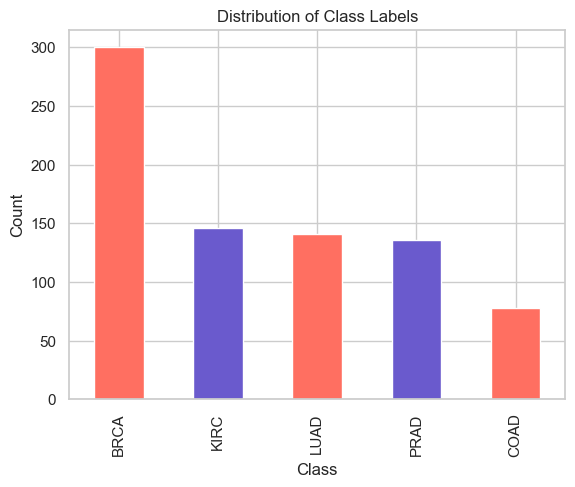

In [12]:
print(df_label.head())

print('Columns : ', df_label.columns)
label_col = df_label.columns[1]
df_label[label_col].value_counts().plot(kind='bar', color=['#ff6f61','#6a5acd'])
plt.title('Distribution of Class Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Total missing values :  0
        count      mean       std       min       25%       50%        75%  \
gene_0  801.0  0.026642  0.136850  0.000000  0.000000  0.000000   0.000000   
gene_1  801.0  3.010909  1.200828  0.000000  2.299039  3.143687   3.883484   
gene_2  801.0  3.095350  1.065601  0.000000  2.390365  3.127006   3.802534   
gene_3  801.0  6.722305  0.638819  5.009284  6.303346  6.655893   7.038447   
gene_4  801.0  9.813612  0.506537  8.435999  9.464466  9.791599  10.142324   

              max  
gene_0   1.482332  
gene_1   6.237034  
gene_2   6.063484  
gene_3  10.129528  
gene_4  11.355621  


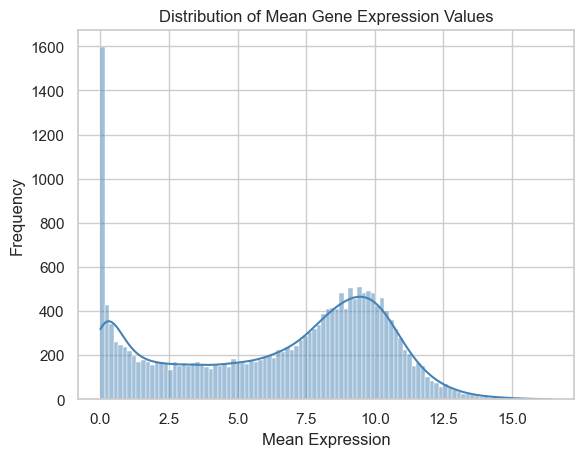

In [13]:
null_counts = df_data.isnull().sum().sum()
print('Total missing values : ', null_counts)

desc = df_data.describe().T
print(desc.head())

df_numeric = df_data.select_dtypes(include = [np.number])

gene_means = df_numeric.mean(axis=0)
sns.histplot(gene_means, bins = 100, kde = True, color = 'steelblue')
plt.title('Distribution of Mean Gene Expression Values')
plt.xlabel('Mean Expression')
plt.ylabel('Frequency')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

df_data_clean = df_data.drop(columns = ['Unnamed: 0'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_data_clean)

print('Original shape : ', df_data_clean.shape)
print('Scaled shape : ', X_scaled.shape)

Original shape :  (801, 20531)
Scaled shape :  (801, 20531)


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

print('PCA shape :', X_pca.shape)

PCA shape : (801, 2)


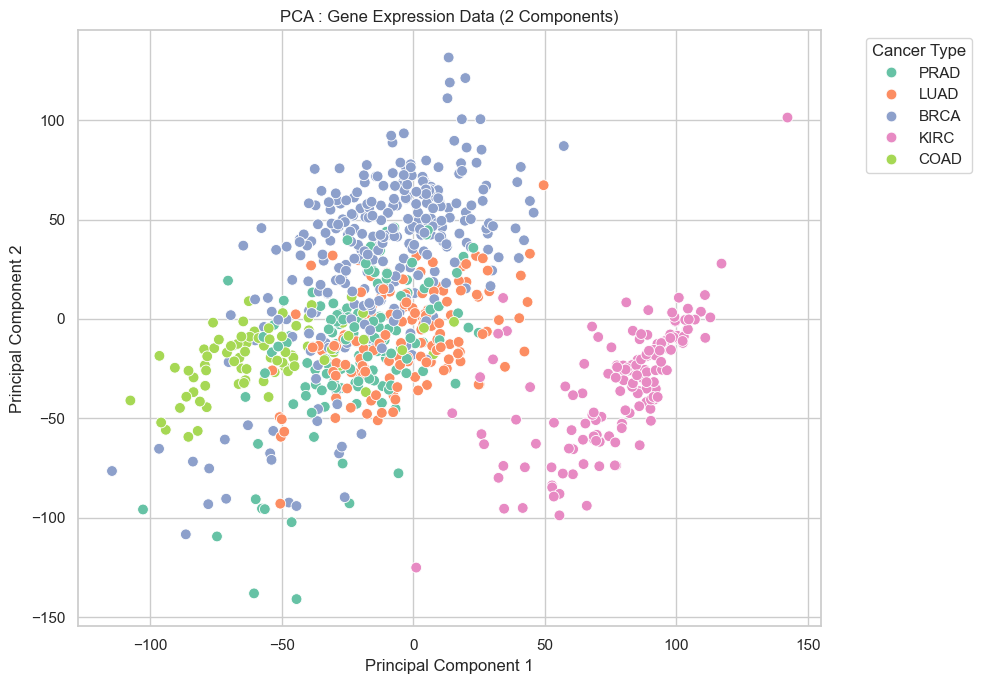

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = df_label['Class']

plt.figure(figsize = (10,7))
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue = labels, palette = 'Set2', s = 60)
plt.title('PCA : Gene Expression Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Cancer Type', bbox_to_anchor=(1.05,1), loc = 'upper left')
plt.tight_layout()
plt.show()

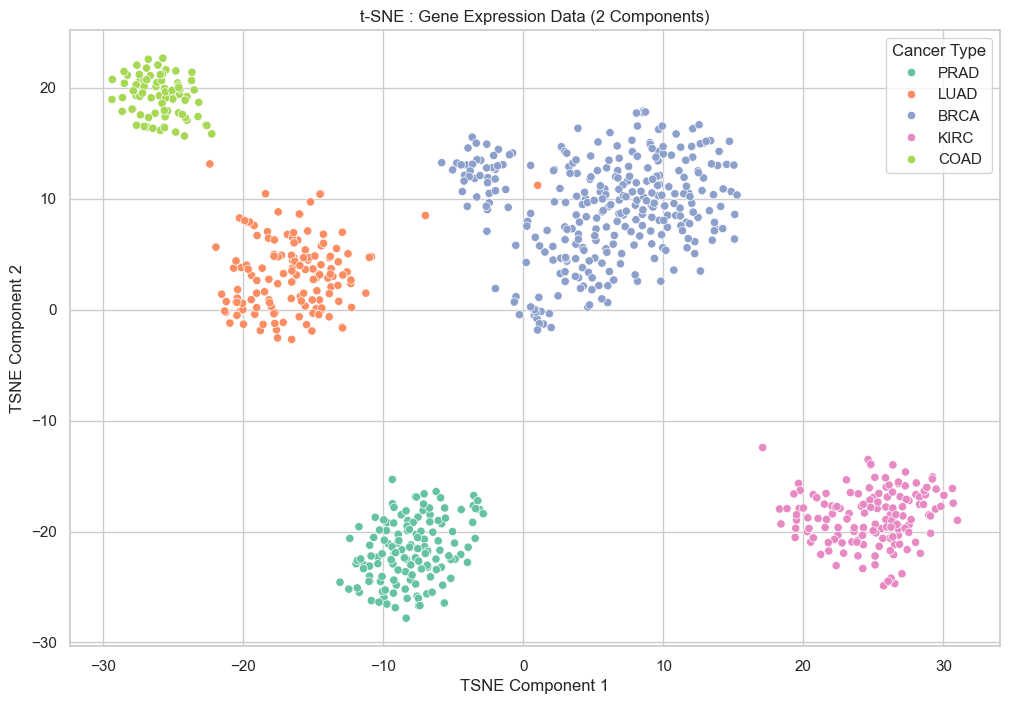

t-SNE shape :  (801, 2)


In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 30, max_iter = 1000, random_state = 42)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(data=X_tsne, columns = ['TSNE Component 1', 'TSNE Component 2'])
df_tsne['Cancer Type'] = df_label['Class']

plt.figure(figsize = (12,8))
sns.scatterplot(data = df_tsne, x = 'TSNE Component 1', y= 'TSNE Component 2', hue = 'Cancer Type', palette = 'Set2')
plt.title('t-SNE : Gene Expression Data (2 Components)')
plt.show()

print('t-SNE shape : ', X_tsne.shape)

In [18]:
print(df_label.head())
print(df_label.columns)

  Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA
Index(['Unnamed: 0', 'Class'], dtype='object')


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_label['Class'], test_size=0.2, random_state=42, stratify=df_label['Class'])

In [20]:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100,random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = rf_model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('\nClassification Report : \n', classification_report(y_test, y_pred))

Accuracy :  0.9875776397515528

Classification Report : 
               precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.93      0.96        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



<Figure size 800x600 with 0 Axes>

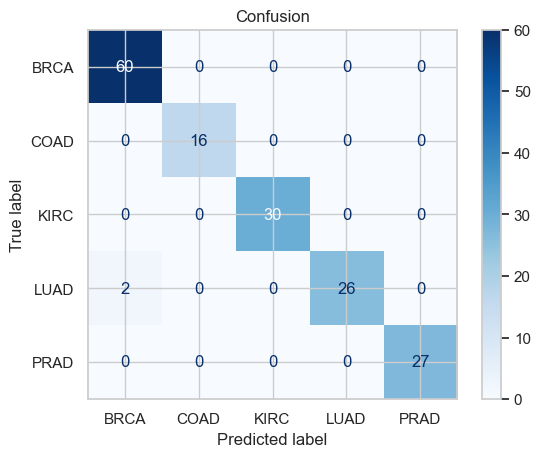

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels = rf_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', values_format = 'd')
plt.title('Confusion')
plt.show()

C:\Users\mmmdu\AppData\Local\Temp\ipykernel_17640\1866810081.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


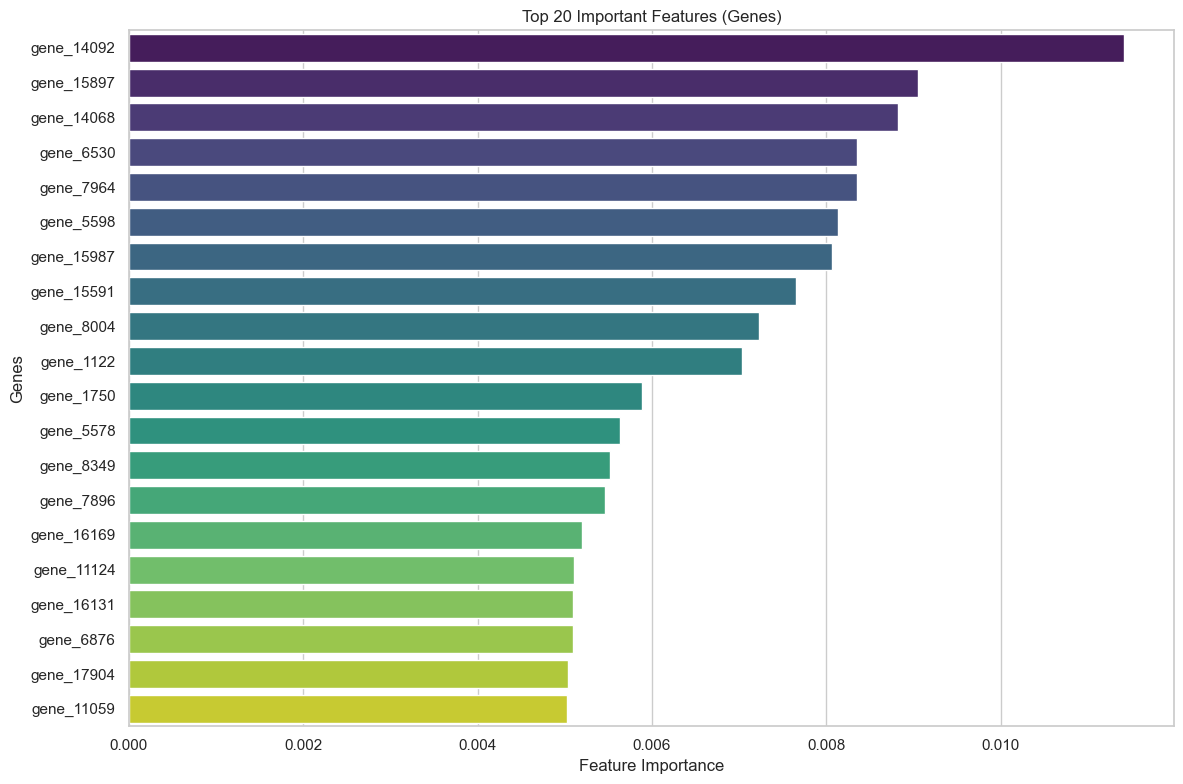

In [23]:
importances = rf_model.feature_importances_

feature_names = df_data.iloc[:, 1:].columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 20 Important Features (Genes)')
plt.xlabel('Feature Importance')
plt.ylabel('Genes')
plt.tight_layout()
plt.show()

In [24]:
important_genes = feat_imp_df['Feature'].tolist()
print(important_genes)

['gene_14092', 'gene_15897', 'gene_14068', 'gene_6530', 'gene_7964', 'gene_5598', 'gene_15987', 'gene_15591', 'gene_8004', 'gene_1122', 'gene_1750', 'gene_5578', 'gene_8349', 'gene_7896', 'gene_16169', 'gene_11124', 'gene_16131', 'gene_6876', 'gene_17904', 'gene_11059']


In [25]:
top_features = feat_imp_df['Feature'].values

X_top = df_data[top_features]

from sklearn.preprocessing import StandardScaler
scaler_top = StandardScaler()
X_top_scaled = scaler_top.fit_transform(X_top)

from sklearn.model_selection import train_test_split
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top_scaled, df_label['Class'], test_size = 0.2, random_state = 42, stratify = df_label['Class']
)

from sklearn.ensemble import RandomForestClassifier
rf_model_top = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model_top.fit(X_train_top, y_train_top)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_top = rf_model_top.predict(X_test_top)
print("Accuracy (Top 20 Genes):", accuracy_score(y_test_top, y_pred_top))
print('Classification Report : \n', classification_report(y_test_top, y_pred_top))

Accuracy (Top 20 Genes): 0.9875776397515528
Classification Report : 
               precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        30
        LUAD       0.96      0.96      0.96        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.98      0.98       161
weighted avg       0.99      0.99      0.99       161



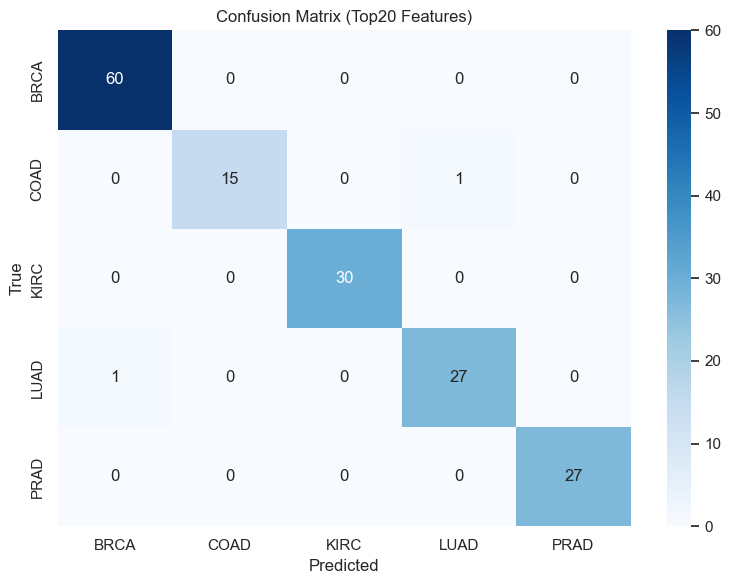

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_top, y_pred_top)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues',xticklabels = rf_model_top.classes_, yticklabels = rf_model_top.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Top20 Features)')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.1, 1, 10],
    'gamma' : [1,0.1,0.01],
    'kernel' : ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = 5)
grid.fit(X_train_top, y_train_top)

print('Best parametres ', grid.best_params_)

y_pred_grid = grid.predict(X_test_top)
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy : '  , accuracy_score(y_test_top, y_pred_grid))
print('Classification Report \n : ', classification_report(y_test_top, y_pred_grid))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parametres  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy :  0.9937888198757764
Classification Report 
 :                precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       0.96      1.00      0.98        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



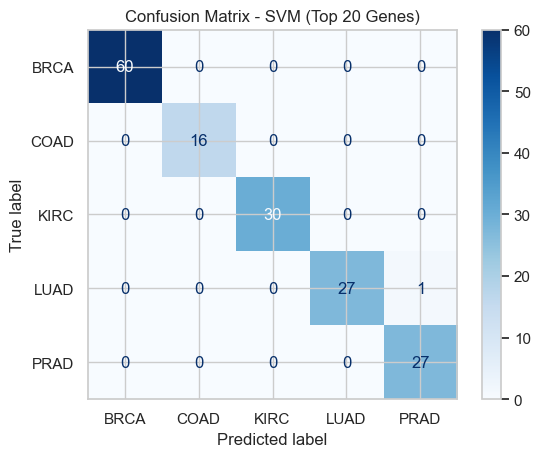

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_svm = grid.predict(X_test_top)
cm = confusion_matrix(y_test_top, y_pred_svm, labels = grid.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = grid.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix - SVM (Top 20 Genes)')
plt.show()

In [29]:
best_svm_model = grid.best_estimator_
results = {}
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = {
    'SVM' : best_svm_model,
    'Random Forest' : rf_model,
    'KNN' : KNeighborsClassifier(n_neighbors = 5),
    'Logistic Regression' : LogisticRegression(max_iter = 1000),
}

for name, model in models.items() :
  model.fit(X_train_top, y_train_top)
  preds = model.predict(X_test_top)
  acc = accuracy_score(y_test_top, preds)
  report = classification_report(y_test_top, preds, output_dict = False)

  print(f"--- {name} ---")
  print(f"Accuracy: {acc:.4f}")
  print("Classification Report:\n", report)
  results[name] = acc

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_top)
y_test_encoded = le.transform(y_test_top)

xgb_model = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss', random_state = 42)

xgb_model.fit(X_train_top, y_train_encoded)
preds_encoded = xgb_model.predict(X_test_top)
acc = accuracy_score(y_test_encoded, preds)

preds_labels = le.inverse_transform(preds_encoded)

print("XGBoost Accuracy:", accuracy_score(y_test_top, preds_labels))
print("Classification Report:\n", classification_report(y_test_top, preds_labels))

--- SVM ---
Accuracy: 0.9938
Classification Report:
               precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       0.96      1.00      0.98        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161

--- Random Forest ---
Accuracy: 0.9876
Classification Report:
               precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        30
        LUAD       0.96      0.96      0.96        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg   

c:\Users\mmmdu\anaconda3\envs\uz\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9875776397515528
Classification Report:
               precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.98      0.99       161
weighted avg       0.99      0.99      0.99       161



In [30]:
import joblib
import os

# notebook klasöründen bir üst dizine çık ve 'model/' klasörünü hedefle
model_path = "../model/best_svm_model.pkl"

# Klasörü oluştur (bir üst dizindeki 'model/' klasörü)
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Modeli kaydet
joblib.dump(best_svm_model, model_path)

print(f"done: {model_path}")

done: ../model/best_svm_model.pkl


In [35]:
print(df_data.columns.tolist())

['Unnamed: 0', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6', 'gene_7', 'gene_8', 'gene_9', 'gene_10', 'gene_11', 'gene_12', 'gene_13', 'gene_14', 'gene_15', 'gene_16', 'gene_17', 'gene_18', 'gene_19', 'gene_20', 'gene_21', 'gene_22', 'gene_23', 'gene_24', 'gene_25', 'gene_26', 'gene_27', 'gene_28', 'gene_29', 'gene_30', 'gene_31', 'gene_32', 'gene_33', 'gene_34', 'gene_35', 'gene_36', 'gene_37', 'gene_38', 'gene_39', 'gene_40', 'gene_41', 'gene_42', 'gene_43', 'gene_44', 'gene_45', 'gene_46', 'gene_47', 'gene_48', 'gene_49', 'gene_50', 'gene_51', 'gene_52', 'gene_53', 'gene_54', 'gene_55', 'gene_56', 'gene_57', 'gene_58', 'gene_59', 'gene_60', 'gene_61', 'gene_62', 'gene_63', 'gene_64', 'gene_65', 'gene_66', 'gene_67', 'gene_68', 'gene_69', 'gene_70', 'gene_71', 'gene_72', 'gene_73', 'gene_74', 'gene_75', 'gene_76', 'gene_77', 'gene_78', 'gene_79', 'gene_80', 'gene_81', 'gene_82', 'gene_83', 'gene_84', 'gene_85', 'gene_86', 'gene_87', 'gene_88', 'gene_89', 'gene

In [38]:
import joblib

joblib.dump(important_genes, "../model/top_20_features.pkl")

['../model/top_20_features.pkl']